In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [3]:
# convert to numeric, drop nas and other [currently] irrelevant features
def preprocess(filename):
    df = pd.read_csv(filename+'.csv', sep=",")
    # removing unnecessary columns. keeping only numbers atm
    unnecessary = ['Body','ClosedDate','CommunityOwnedDate','CreationDate','Id','LastActivityDate',
              'LastEditDate','LastEditorUserId','LastEditorDisplayName','OwnerDisplayName',
              'OwnerUserId','ParentId','Tags','Title','Clean_Text','AcceptedAnswerId','Score',
              'AnswerCount', 'CommentCount', 'FavoriteCount', 'PostTypeId','ViewCount']
    droppable = np.intersect1d(df.columns,unnecessary)
    df = df.drop(droppable, 1)
    df = df.dropna()
    if df.shape[0]>30000:
        df = df[:30000]
    return df

In [4]:
# Split Data Into Train and Test Data
def splitIntoTestAndTrain(dataFrame,splitBy):
    rand = list(range(len(dataFrame)))
    div = int(len(dataFrame) * splitBy)
    rd.shuffle(rand)
    train_df_index = rand[:div]
    test_df_index = rand[div:]
    train_df = dataFrame.iloc[train_df_index, :]
    test_df = dataFrame.iloc[test_df_index, :]
    return train_df,test_df;

In [12]:
#Best SVM Classifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [10.**i for i in np.arange(-2,2)]},
                    {'kernel': ['linear'], 'C': [10.**i for i in np.arange(-2,2)]}]
    #param_grid = [{'C': [10.**i for i in np.arange(-2,2)], 'kernel': ['linear']}]
    grid_search = GridSearchCV(svm.SVC(probability=True), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    #clf=SVC(kernel='linear', probability=True)
    #clf.fit(X,y)
    #return clf
    return grid_search.best_estimator_

In [13]:
def reportCard(y_true, y_pred, y_proba,name):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    %matplotlib inline
    print('\nReport for:',name)
    target_names = ['low', 'high']
    print(metrics.classification_report(y_true, y_pred, target_names=target_names))
    print("Confusion Matrix\n",metrics.confusion_matrix(y_true,y_pred))
    print("F1 Score:",metrics.f1_score(y_true,y_pred))
    print("Accuracy:",metrics.accuracy_score(y_true,y_pred))
    print("Log Loss:",metrics.log_loss(y_true,y_pred))
    print("AUC Score:",metrics.roc_auc_score(y_true,y_proba[:,1]))
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_proba[:,1])
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for {}'.format(name))
    plt.legend(loc='best')
    plt.show()

In [14]:
def svm_run(filename):
    print("\nRunning for",filename)
    df = preprocess(filename)
    print("dataset size is:",df.shape)
    print("columns:",df.columns)
    train,test=splitIntoTestAndTrain(df,0.8)
    print("\nSVM")
    best_svm = svc_param_selection(train.drop('ScoreLabel', 1),train['ScoreLabel'],5)
    grid_svm_pred = best_svm.predict(test.drop('ScoreLabel', 1))
    grid_svm_pred_prob = best_svm.predict_proba(test.drop('ScoreLabel', 1))
    print("*****BOF: {}*****".format(filename))
    reportCard(test['ScoreLabel'], grid_svm_pred, grid_svm_pred_prob,'GridSearched SVM')
    print("*****EOF: {}*****".format(filename))


Report for: GridSearched SVM
             precision    recall  f1-score   support

        low       0.58      0.19      0.29       185
       high       0.46      0.83      0.59       151

avg / total       0.53      0.48      0.42       336

Confusion Matrix
 [[ 35 150]
 [ 25 126]]
F1 Score: 0.590163934426
Accuracy: 0.479166666667
Log Loss: 17.9893030022
AUC Score: 0.433828530517


/Users/amanmahato/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


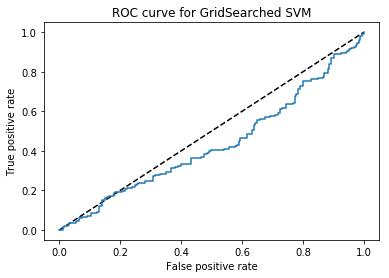

In [17]:
grid_svm_pred1 = clf.predict(test.drop('ScoreLabel', 1))
grid_svm_pred_prob1 = clf.predict_proba(test.drop('ScoreLabel', 1))
reportCard(test['ScoreLabel'], grid_svm_pred1, grid_svm_pred_prob1,'GridSearched SVM')


Running for ai_posts_with_readibility_measures_score_adj
dataset size is: (1680, 10)
columns: Index(['Flesch_Reading_Ease_Value', 'Coleman_Liau_Index_Value',
       'Dale_Chall_Readability_Score', 'Code_Count', 'Latex_Count',
       'Text_Length', 'Punc_Rate', 'Polarity', 'Subjectivity', 'ScoreLabel'],
      dtype='object')

SVM
*****BOF: ai_posts_with_readibility_measures_score_adj*****

Report for: GridSearched SVM
             precision    recall  f1-score   support

        low       0.62      0.93      0.74       207
       high       0.38      0.07      0.12       129

avg / total       0.52      0.60      0.50       336

Confusion Matrix
 [[192  15]
 [120   9]]
F1 Score: 0.117647058824
Accuracy: 0.598214285714
Log Loss: 13.8772226407
AUC Score: 0.577051267648


/Users/amanmahato/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


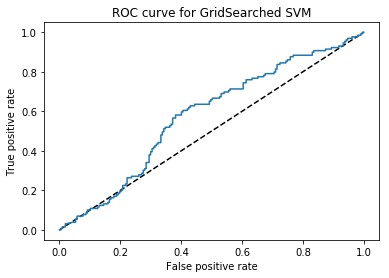

*****EOF: ai_posts_with_readibility_measures_score_adj*****


In [10]:
svm_run("ai_posts_with_readibility_measures_score_adj")#without grid


Running for iot_posts_with_readibility_measures_score_adj
dataset size is: (1048, 10)
columns: Index(['Flesch_Reading_Ease_Value', 'Coleman_Liau_Index_Value',
       'Dale_Chall_Readability_Score', 'Code_Count', 'Latex_Count',
       'Text_Length', 'Punc_Rate', 'Polarity', 'Subjectivity', 'ScoreLabel'],
      dtype='object')

SVM
*****BOF: iot_posts_with_readibility_measures_score_adj*****

Report for: GridSearched SVM
             precision    recall  f1-score   support

        low       0.82      0.47      0.60        49
       high       0.86      0.97      0.91       161

avg / total       0.85      0.85      0.84       210

Confusion Matrix
 [[ 23  26]
 [  5 156]]
F1 Score: 0.909620991254
Accuracy: 0.852380952381
Log Loss: 5.09868027512
AUC Score: 0.740144505007


/Users/amanmahato/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


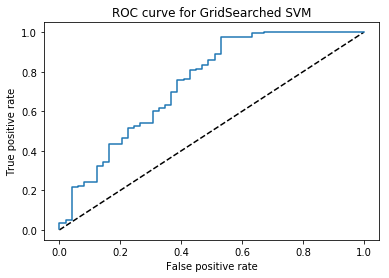

*****EOF: iot_posts_with_readibility_measures_score_adj*****


In [11]:
svm_run("iot_posts_with_readibility_measures_score_adj")#without Grid Search


Running for ai_posts_with_readibility_measures_score_adj
dataset size is: (1680, 10)
columns: Index(['Flesch_Reading_Ease_Value', 'Coleman_Liau_Index_Value',
       'Dale_Chall_Readability_Score', 'Code_Count', 'Latex_Count',
       'Text_Length', 'Punc_Rate', 'Polarity', 'Subjectivity', 'ScoreLabel'],
      dtype='object')

SVM
*****BOF: ai_posts_with_readibility_measures_score_adj*****

Report for: GridSearched SVM
             precision    recall  f1-score   support

        low       0.64      0.97      0.77       214
       high       0.40      0.03      0.06       122

avg / total       0.55      0.63      0.51       336

Confusion Matrix
 [[208   6]
 [118   4]]
F1 Score: 0.0606060606061
Accuracy: 0.630952380952
Log Loss: 12.7464674719
AUC Score: 0.544545733109


/Users/amanmahato/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


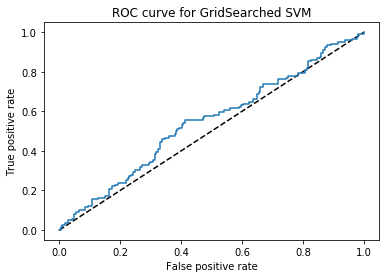

*****EOF: ai_posts_with_readibility_measures_score_adj*****


In [16]:
svm_run("ai_posts_with_readibility_measures_score_adj")


Running for iot_posts_with_readibility_measures_score_adj
dataset size is: (1048, 10)
columns: Index(['Flesch_Reading_Ease_Value', 'Coleman_Liau_Index_Value',
       'Dale_Chall_Readability_Score', 'Code_Count', 'Latex_Count',
       'Text_Length', 'Punc_Rate', 'Polarity', 'Subjectivity', 'ScoreLabel'],
      dtype='object')

SVM
*****BOF: iot_posts_with_readibility_measures_score_adj*****

Report for: GridSearched SVM
             precision    recall  f1-score   support

        low       0.81      0.56      0.66        68
       high       0.82      0.94      0.87       142

avg / total       0.81      0.81      0.80       210

Confusion Matrix
 [[ 38  30]
 [  9 133]]
F1 Score: 0.872131147541
Accuracy: 0.814285714286
Log Loss: 6.41445841583
AUC Score: 0.789353769677


/Users/amanmahato/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


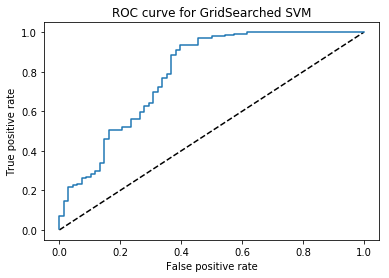

*****EOF: iot_posts_with_readibility_measures_score_adj*****


In [15]:
svm_run("iot_posts_with_readibility_measures_score_adj")